In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import keras
from keras import regularizers

2024-03-29 04:45:15.756602: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-29 04:45:15.756790: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-29 04:45:15.971761: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
data = pd.read_csv('/kaggle/input/cardekho/cardekho.csv',index_col=0)
data.isnull().sum()

year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             216
seats                 221
dtype: int64

In [3]:
data = data.dropna()
one_hot_encoded_data = pd.get_dummies(data, columns = ['fuel', 'seller_type','transmission','owner'], dtype='int')
one_hot_encoded_data.isnull().sum()

year                            0
selling_price                   0
km_driven                       0
mileage(km/ltr/kg)              0
engine                          0
max_power                       0
seats                           0
fuel_CNG                        0
fuel_Diesel                     0
fuel_LPG                        0
fuel_Petrol                     0
seller_type_Dealer              0
seller_type_Individual          0
seller_type_Trustmark Dealer    0
transmission_Automatic          0
transmission_Manual             0
owner_First Owner               0
owner_Fourth & Above Owner      0
owner_Second Owner              0
owner_Test Drive Car            0
owner_Third Owner               0
dtype: int64

In [4]:
X = one_hot_encoded_data.drop(['selling_price'], axis=1)
y = one_hot_encoded_data['selling_price']

inputdim = len(X.columns)

sc_x = StandardScaler()
Xscaled = sc_x.fit_transform(X)

In [5]:
def define_model(input_size):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(2048,input_dim=input_size, activation='relu'))
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Dense(1028, activation='relu',
                                kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
                                bias_regularizer=regularizers.L2(1e-4),
                                activity_regularizer=regularizers.L2(1e-5)))
    model.add(keras.layers.Dense(1028, activation='relu',
                                kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
                                bias_regularizer=regularizers.L2(1e-4),
                                activity_regularizer=regularizers.L2(1e-5)))
    model.add(keras.layers.Dense(1028, activation='relu',
                                kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
                                bias_regularizer=regularizers.L2(1e-4),
                                activity_regularizer=regularizers.L2(1e-5)))
    model.add(keras.layers.Dense(512, activation='relu'))
    model.add(keras.layers.Dense(512, activation='relu'))
    model.add(keras.layers.Dropout(0.1))
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dense(1, activation='relu'))
    return model

In [6]:
X_train, X_test, y_train, y_test = train_test_split(Xscaled, y, test_size=0.33, random_state=42)

In [7]:
model = define_model(inputdim)

model.compile(
    optimizer=keras.optimizers.Adam(),
    loss='mae'
)
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=128, 
    validation_split=0.2, 
    verbose=2
)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
34/34 - 7s - 192ms/step - loss: 490460.2500 - val_loss: 250332.7500
Epoch 2/10
34/34 - 5s - 138ms/step - loss: 205834.1562 - val_loss: 174275.0156
Epoch 3/10
34/34 - 5s - 149ms/step - loss: 174965.9219 - val_loss: 167328.2969
Epoch 4/10
34/34 - 3s - 90ms/step - loss: 158420.5938 - val_loss: 147721.8438
Epoch 5/10
34/34 - 3s - 86ms/step - loss: 145967.4219 - val_loss: 132383.5625
Epoch 6/10
34/34 - 3s - 87ms/step - loss: 141402.3906 - val_loss: 149651.7812
Epoch 7/10
34/34 - 5s - 150ms/step - loss: 134202.7969 - val_loss: 132733.2344
Epoch 8/10
34/34 - 5s - 151ms/step - loss: 133867.7500 - val_loss: 130726.5000
Epoch 9/10
34/34 - 3s - 90ms/step - loss: 122904.8750 - val_loss: 132040.5312
Epoch 10/10
34/34 - 5s - 149ms/step - loss: 117400.6484 - val_loss: 124973.3047


In [8]:
y_pred = model.predict(X_test)

82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


In [9]:
dftest = pd.DataFrame(y_test)
dftest.insert(1,'prediction',y_pred,True)
dftest.to_csv('out.csv', index=True)

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.10/site-packages/matplotlib/pyplot.py'>

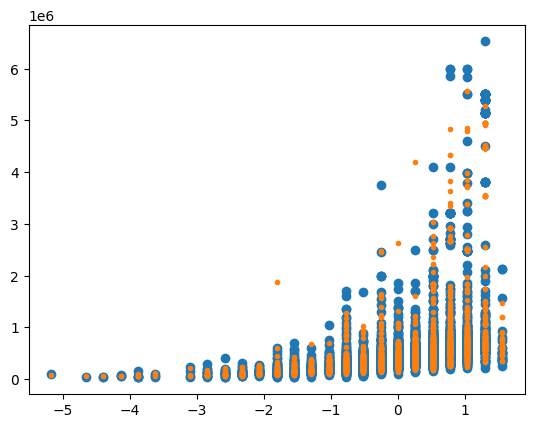

In [10]:
plt.plot(X_test[:,0], y_test, 'o')
plt.plot(X_test[:,0], y_pred, '.')
plt